# Introduction to using Earth data
Author: Rebekah Esmaili, PhD (bekah@umd.edu)

This tutorial is an introduction to working with Earth science datasets.

## Prerequisites
A basic understanding of Python. A basic understanding of jupyter notebooks is recommended. You will need to know how to import packages, subset data, and use matplotlib/numpy/pandas.

## Tutorial Contents
1. Introduction
2. Accessing tutorial data
3. Reading data
4. Subsetting the data
5. Making a plot
6. Making a map
7. Exercise

## Introduction
Today we will look at the sea surface temperature (SST) variable from the [NOAA Extended Reconstructed SST version 5 dataset (ERSST)](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html). This dataset shows the global monthly mean ocean surface temperature from 1854-present using data collected from ocean buoys, ships, and climate modeled data. This data can be used for climate research and monitoring for El Nino/La Nina.

## Where to access satellite data
List of many gridded climate datasets distributed by NOAA: https://www.psl.noaa.gov/data/gridded/ Today, we'll use [netcdf](https://en.wikipedia.org/wiki/NetCDF) files. These are structured binary files so they can store large data in a small format. They also have lots of metadata/attribute tags so we can learn information about the data.

We can access the data directly using [Open-source Project for a Network Data Access Protocol (OPeNDAP)](https://www.opendap.org/), which simplifies access. Instead of downloading and reading data into Python, we can access it directly using a URL. 

Below, I am writing out the url for the data. You can also browse the catalog after the tutorial to discover other interesting data! 

In [1]:
data_url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'

# Packages to read satellite data and make maps
There are several packages to open netcdf files, but today we will learn [xarray](http://xarray.pydata.org/en/stable/index.html). Xarray takes a little time to learn, but is similar to using pandas and numpy. Xarray was [recently funded by NASA](https://github.com/pydata/xarray/discussions/5828) to continue development!

Another useful package is [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), which integrates with matplotlib to make maps and geospatial plots.

In [2]:
# import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

Next, we need to read in the data using xarray (xr). The command is open_dataset and we only need to give it the url which has the data (note: xarray will also open data on your local machine). NetCDF files do not usually contain a single variable, but is a large matrix of data with many variables and attributes. We can print the sst_ds variable to show some of the available data.

In [3]:
# Read the dataset directly into memory from the website
sst_ds = xr.open_dataset(data_url)

# Print the contents of the dataset
sst_ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2013, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-09-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/38)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2021-10-07
    DODS_EXTRA.Unlimited_Dimension:  time

In the text output above, we can see there are three coordinates: lat (latitude), lon (longitude), time, and nbnds (number of bounds). The dimensions of these variables are respectively 89, 180, and 2013 (at the time of writing). This is a *lot* of data! If I want to make a plot, I need to reduce this to 2 dimensions (x, y) or 3 dimensions (x,y,z) because that's all we can see.

There are two variables, sst and time_bnds. Let's expore the sst dataset, including the attributes. We can extract the sst dataset from sst_ds into a new variable called sst_da.

In [4]:
sst_da = sst_ds.sst
sst_da

<xarray.DataArray 'sst' (time: 2013, lat: 89, lon: 180)>
[32248260 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-09-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

You may have to click on the arrow to display the attributes. We won't use any attributes today, but it's helpful to know this information. For instance, the units could be Farenheit, Celsius, or Kelvin, we can learn from the units attribute that it's in Celsius.

sst_da still has over 2000 time dimensions, each dimension index is the month since January 1854. So index 0 is January 1854, 1 is February 1854, etc. In python, the index starts at 0. 

For simplicity, let's look at September 2021 (index=2012). You are welcome to explore other times by changing the index value. To extract this one time period, use the isel command. The syntax looks like the pseudocode below, replace the <> with the relevant name:

```
<data_array>.isel(<dim_name>=<index number>)
```

In our example, \<data_array\> is sst_da, \<dim_name\> is time, and \<index number\> is 2012 (September, 2021)

In [5]:
most_recent = 2012
recent_sst = sst_da.isel(time=most_recent)

Now we can use matplotlib to make a plot. I added a few options to help make the plot more aesthetically pleasing (e.g. increasing the figure size, changing the color map, and adding min nad max values). Like pandas, xarray can interfaces directly with matplotlib to make 3D plots. It will also automatically add a legend and titles. However, you can also plot the data manually with matplotlib commands.

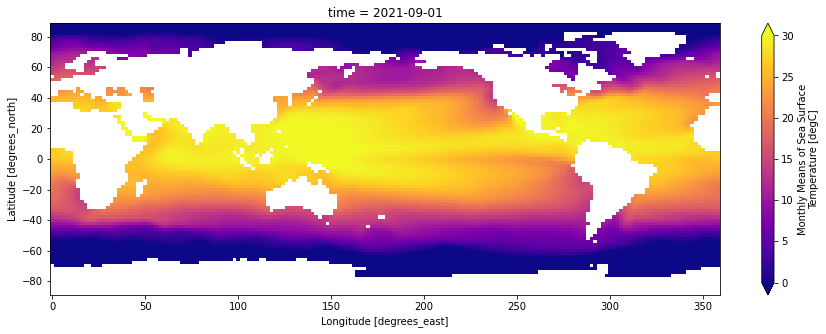

In [6]:
plt.figure(figsize=[15,5])
recent_sst.plot(cmap=plt.get_cmap('plasma'), vmin=0, vmax=30)
plt.show()

From the plot above, you can see how the ocean waters are warmer near the equator and cooler closer to the poles. One enhancement would be to add the outlines of the map, which we cna do with Cartopy. We can start with the same code as above, but add two new lines:

```
ax = plt.subplot(projection=ccrs.PlateCarree())
```
This adds a subplot with the [Plate Carree map projection](https://en.wikipedia.org/wiki/Equirectangular_projection). This line tells matplotlib that the latitude-longitude coordinates in the data are geographical coordinates, not just index numbers.
 
```
ax.coastlines()
```
This command adds the map to the plot. This is just one example, there are [many other features](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) and customizations you can perform.

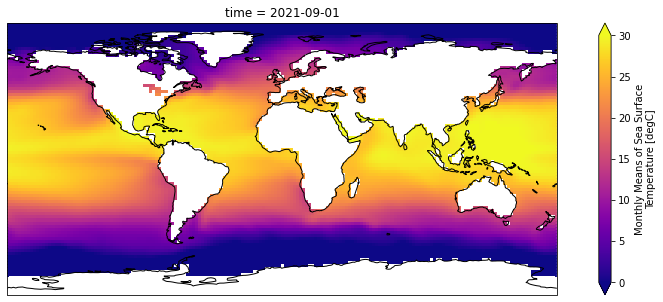

In [8]:
plt.figure(figsize=[15,5])
ax = plt.subplot(projection=ccrs.PlateCarree())
recent_sst.plot(cmap=plt.get_cmap('plasma'), vmin=0, vmax=30)
ax.coastlines()
plt.show()

# Exercise
* Pick another month in the dataset above, see how the SST changes depending on the time of the year!

# Key Points

* There's a lot of earth data to explore online
* Xarray is a great package for opening and subsetting these datasets
* You can use matplotlib to make plots of datasets and cartopy to make maps

# Next steps

* Learn more about other Earth datasets via [The NOAA Physical Sciences Lab](https://www.psl.noaa.gov/data/gridded/), [NASA EarthData](https://earthdata.nasa.gov/) and [NOAA NCEI](https://www.ncei.noaa.gov/)
* Learn more about [Python for Atmosphere and Ocean Scientists](https://carpentries-lab.github.io/python-aos-lesson/) using Software Carpentry lesson plans. 
* I have a longer workshop on [Python for Earth Science with Rebekah](https://youtube.com/playlist?list=PLlcgQ3Rl-9fR4oOmfeKPKHuk2Lj57bNJy)
* Request copy of my book [Earth Observation using Python](https://www.wiley.com/en-us/Earth+Observation+using+Python%3A+A+Practical+Programming+Guide-p-9781119606888) through inter library loan from your university library!

# Acronym List

* ICOADS: International Comprehensive Ocean-Atmosphere Data Set
* ERSST: Extended Reconstructed Sea Surface Temperature
* OPeNDAP: Open-source Project for a Network Data Access Protocol
* NASA: National Aeronautics and Space Administration
* NetCDF: Network Common Data Form
* NOAA: National Oceanographic and Atmospheric Administration
* SST: Sea Surface Temperature